In [13]:
'''
Pressure measurement of electrohydraulic pump
'''

import time
from os import walk
import os.path as ospa
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 14})

Fs = 1000
dataPath = ".\Data0719"

calib = np.loadtxt('Calibration20210719.txt')
print("Calibration line a = %.16f, b = %.16f" % (calib[0],calib[1]))

Calibration line a = 0.0498901274651710, b = 0.1328713653732430


In [14]:
'''
General Functions
'''

def aPlot(figName, is3D = False):
    ax = []
    
    fig1 = plt.figure(figsize = (10,4))
    fig1.suptitle(figName, fontsize=16)
    if(is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax

.\Data0719 - Condi. Mylar20 trial01, mean-pres. = 0.093 bar, max-pres. = 0.145 bar (length = 5000)
.\Data0719 - Condi. Mylar20 trial02, mean-pres. = 0.070 bar, max-pres. = 0.096 bar (length = 5000)
.\Data0719 - Condi. BOPP12 trial06, mean-pres. = 0.038 bar, max-pres. = 0.050 bar (length = 5000)
.\Data0719 - Condi. BOPP12 trial07, mean-pres. = 0.040 bar, max-pres. = 0.051 bar (length = 5000)
.\Data0719 - Condi. BOPP12 trial08, mean-pres. = 0.035 bar, max-pres. = 0.045 bar (length = 5000)
.\Data0719 - Condi. BOPP12 trial11, mean-pres. = 0.018 bar, max-pres. = 0.031 bar (length = 5000)
.\Data0719 - Condi. BOPP12 trial12, mean-pres. = 0.025 bar, max-pres. = 0.041 bar (length = 5000)
.\Data0719 - Condi. BOPP16 trial04, mean-pres. = 0.034 bar, max-pres. = 0.046 bar (length = 5000)
.\Data0719 - Condi. BOPP16 trial05, mean-pres. = 0.052 bar, max-pres. = 0.066 bar (length = 5000)
.\Data0719 - Condi. BOPP16 trial06, mean-pres. = 0.049 bar, max-pres. = 0.061 bar (length = 5000)
.\Data0719 - Condi

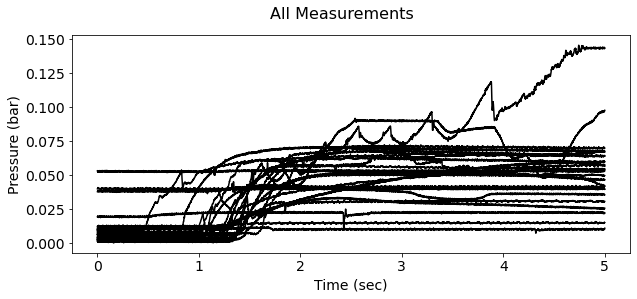

In [18]:
ax = aPlot('All Measurements')

presData = []
for root, directories, files in walk(dataPath):
    for fileName in files:
        condi = re.split('6mL|\.', fileName, maxsplit = 2)[1]
        names = re.split('_t', condi, maxsplit = 1)
        trialNum = int(names[1])
        
        data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
        dataLen = len(data)
        
        ax.plot(np.arange(dataLen)/Fs, (data-calib[1])*calib[0], color = 'k')       
        
        meanVoltage = np.mean(data[int(dataLen/2):]) - data[0]     
        meanPressure = (meanVoltage-calib[1])*calib[0]
        
        maxVoltage = np.max(data) - np.min(data);
        maxPressure = maxVoltage*calib[0]
        
        print("%s - Condi. %s trial%02d, mean-pres. = %.3f bar, max-pres. = %.3f bar (length = %d)" % 
              (root, names[0], trialNum, meanPressure, maxPressure, dataLen))

        presData.append([names[0], trialNum, meanPressure, maxPressure])
        
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Pressure (bar)')
        
presData = pd.DataFrame(presData, columns = ['Condition','Trial','MeanPressure','MaxPressure'])

In [3]:
condiNames = pd.unique(presData['Condition'])
condiNum = len(condiNames)
print("In total %d conditions: %s" % (condiNum, condiNames))

In total 6 conditions: ['Mylar20' 'BOPP12' 'BOPP16' 'BOPP20' 'L0Ws12' 'L0Ws12SoftTube']


In [4]:
for condi in condiNames:
    condiAvgMax = np.mean(presData.loc[presData['Condition'] == condi, 'MaxPressure'])
    print("%s - avg. max pressure = %.3f bar" % (condi, condiAvgMax))
    
print("-------------------------------------")

for condi in condiNames:
    condiMaxMax = np.max(presData.loc[presData['Condition'] == condi, 'MaxPressure'])
    print("%s - max pressure = %.3f bar" % (condi, condiMaxMax))

Mylar20 - avg. max pressure = 0.120 bar
BOPP12 - avg. max pressure = 0.044 bar
BOPP16 - avg. max pressure = 0.058 bar
BOPP20 - avg. max pressure = 0.035 bar
L0Ws12 - avg. max pressure = 0.009 bar
L0Ws12SoftTube - avg. max pressure = 0.052 bar
-------------------------------------
Mylar20 - max pressure = 0.145 bar
BOPP12 - max pressure = 0.051 bar
BOPP16 - max pressure = 0.066 bar
BOPP20 - max pressure = 0.057 bar
L0Ws12 - max pressure = 0.015 bar
L0Ws12SoftTube - max pressure = 0.069 bar


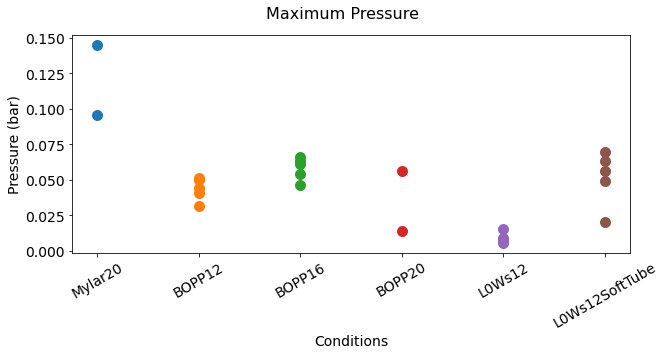

In [5]:
ax = aPlot('Maximum Pressure')
for i in range(condiNum):
    temp = presData.loc[presData['Condition'] == condiNames[i], 'MaxPressure']
    ax.scatter(i*np.ones(temp.size), temp, linewidths = 5)
ax.set_xticks(range(condiNum))
ax.set_xticklabels(condiNames, rotation=30)
ax.set_xlabel('Conditions')
ax.set_ylabel('Pressure (bar)')
plt.show()

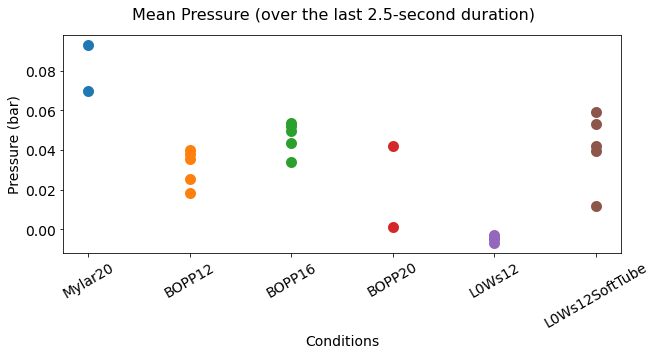

In [17]:
ax = aPlot('Mean Pressure (over the last 2.5-second duration)')
for i in range(condiNum):
    temp = presData.loc[presData['Condition'] == condiNames[i], 'MeanPressure']
    ax.scatter(i*np.ones(temp.size), temp, linewidths = 5)
ax.set_xticks(range(condiNum))
ax.set_xticklabels(condiNames, rotation=30)
ax.set_xlabel('Conditions')
ax.set_ylabel('Pressure (bar)')
plt.show()